# Convergencia de cadenas de Markov
#### 23 de marzo de 2020

Se añade al código el diagnósitco Gelman-Rubin para la convergencia de las cadenas

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def lnlikelihood(x, y, sigma, modelo, parametro):
    return (-1/2)*np.sum(((y-modelo(x, parametro))**2)/sigma**2)

For definition, a prior of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account. For example, in this case I'm going to use the fact that our parameters are in a range [-20, 20]. There are exists many types of priors, I'm going to use a 'flat' prior, a mean, prior is going to have one value.

In [31]:
a = [-20, 20]
b = [-20, 20]
def lnprior(param):
    if param[0] > a[0] and param[0] < a[1] and param[1] > b[0] and param[1] < b[1]:
        param = 0
    else:
        param = -1*np.inf
    return param

In [32]:
def montecarlo_chain(x, y, sigma, modelo, p_i, n, nc):

    markov_matrix = []
    acept = np.zeros(nc)
    
    for ic in range(nc):
    
        P_v = lnlikelihood(x, y, sigma, modelo, p_i[ic])+lnprior(p_i[ic])
        markov_chain = []
        markov_chain.append([p_i[ic], P_v])

        s = [0.1, 0.1]

        for i in range(n):
            p_n = []
            p_n = [np.random.normal(p_i[ic][0], s[0]), np.random.normal(p_i[ic][1], s[1])]

            P_n = lnlikelihood(x, y, sigma, modelo, p_n)+lnprior(p_n)

            if (P_n>P_v):
                markov_chain.append([p_n, P_n])
                acept[ic] = acept[ic]+1
                p_i[ic] = p_n 
                P_v = P_n
                continue
            elif  ((np.exp(P_n)/np.exp(P_v)) > np.random.randn()):
                markov_chain.append([p_n, P_n])
                acept[ic]= acept[ic]+1
    
        markov_matrix.append(markov_chain)
        
    return [markov_matrix, acept]

In [33]:
def modelo(x, parametro):
    return x*parametro[0]+parametro[1]

x = np.linspace(0,10,1000)
p_reales = [4, 9]

des = np.zeros(len(x))
for i in range(len(x)):
    des[i] = 0.1

y = x*p_reales[0] + p_reales[1]

In [34]:
p_i = [[2,2],[10,17],[9,1],[7,10], [-1,8]]
nc = 5
n = 10000

In [35]:
a = montecarlo_chain(x,y,des,modelo, p_i, n, nc)

<ipython-input-32-f2d527455733>:26: RuntimeWarning: invalid value encountered in double_scalars
  elif  ((np.exp(P_n)/np.exp(P_v)) > np.random.randn()):


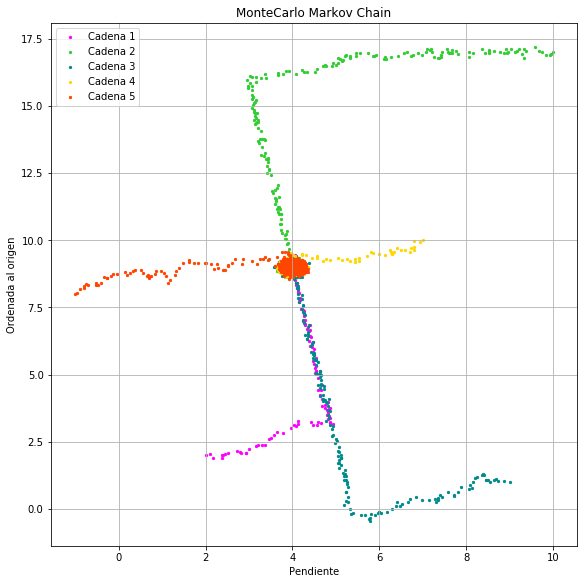

In [36]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
lik = []
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
for i in range(nc):
    puntos = [x for x,y in a[0][i]]
    lik.append([y for x, y in a[0][i]])

    p_fin = [x for x, y in puntos]
    o_fin = [y for x, y in puntos]
    
    plt.scatter(p_fin, o_fin, color=colores[i-1],s=5, label='Cadena '+str(i+1))

plt.title('MonteCarlo Markov Chain')
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.legend()
plt.grid()

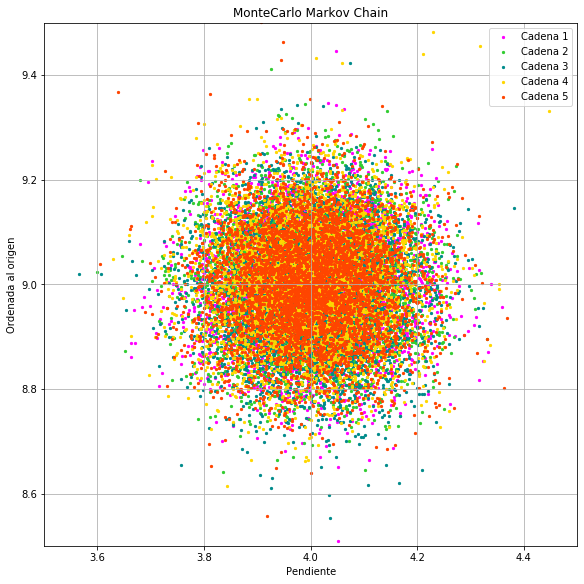

In [37]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
for i in range(nc):
    puntos = [x for x,y in a[0][i]]

    p_fin = [x for x, y in puntos]
    o_fin = [y for x, y in puntos]
    
    plt.scatter(p_fin, o_fin, color=colores[i-1],s=5, label='Cadena '+str(i+1))

plt.title('MonteCarlo Markov Chain')
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.xlim((3.5, 4.5))
plt.ylim((8.5, 9.5))
plt.legend()
plt.grid()

In [38]:
print('La fracción de aceptación de cada cadena es la siguiente: ')
for i in range(nc):
    print('Para la cadena ' + str(i+1) + ' es: ' + str(a[1][i]/n))

La fracción de aceptación de cada cadena es la siguiente: 
Para la cadena 1 es: 0.4935
Para la cadena 2 es: 0.4888
Para la cadena 3 es: 0.4919
Para la cadena 4 es: 0.5009
Para la cadena 5 es: 0.4877


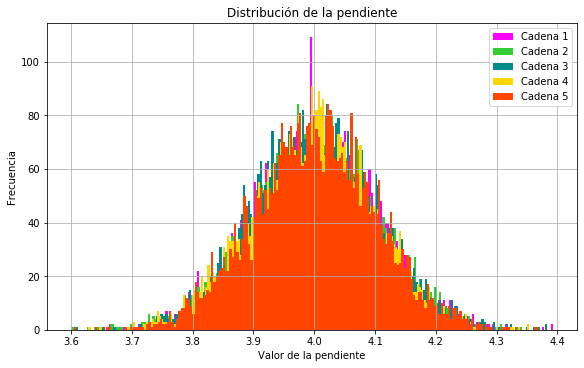

In [39]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
for i in range(nc):
    puntos = [x for x,y in a[0][i]]

    p_fin = [x for x, y in puntos]
    
    p_f = []
    for j in range(len(p_fin)):
        if 3.6<p_fin[j] and p_fin[j]<4.4:
            p_f.append(p_fin[j])
    
    plt.hist(p_f,200, color=colores[i-1],label='Cadena '+str(i+1))
    
plt.title('Distribución de la pendiente')
plt.xlabel('Valor de la pendiente')
plt.ylabel('Frecuencia')
plt.grid()
plt.legend()
plt.show()

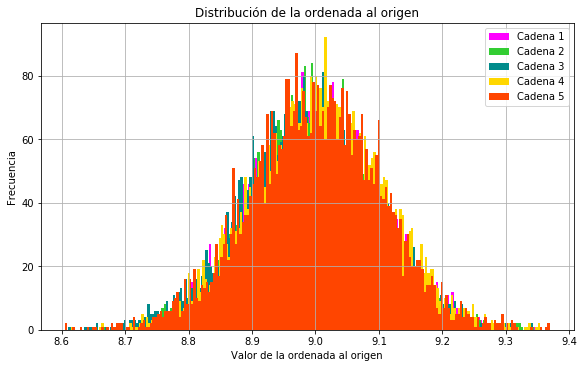

In [40]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
for i in range(nc):
    puntos = [x for x,y in a[0][i]]

    o_fin = [y for x, y in puntos]
    
    o_f = []
    for j in range(len(o_fin)):
        if 8.6<o_fin[j] and o_fin[j]<9.4:
            o_f.append(o_fin[j])
    
    plt.hist(o_f,200, color=colores[i-1],label='Cadena '+str(i+1))
    
plt.title('Distribución de la ordenada al origen')
plt.xlabel('Valor de la ordenada al origen')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid()
plt.show()

## Gelman Rubin diagnostic

Este diagnóstico funciona determinar la convergencia de la cadena. Previamente se tiene que hacer un 'burning' a la cadena para descartar el camino de la cadena. En el diagnóstico se calcula un ''Radio de convergencia''.

In [41]:
pbarr = np.zeros(nc)
sp_2 = np.zeros(nc)
mu_p = 0
count = 0

for i in range(nc):
    puntos = [x for x,y in a[0][i]]

    p_fin = [x for x, y in puntos]
    
    p_f = []
    for j in range(len(p_fin)):
        if 3.6<p_fin[j] and p_fin[j]<4.4:
            p_f.append(p_fin[j])
            count = count + 1
       
    pbarr[i] = np.sum(p_f)/len(p_f)
    sp_2[i] = (1/(n-1))*np.sum((p_f-pbarr[i])**2)
    mu_p = mu_p + np.sum(p_f)

mu_p = mu_p/count
s2_p = (1/nc)*np.sum(sp_2)
bn_p = (1/(nc-1))*np.sum((pbarr-mu_p)**2)
sig2_p = ((n-1)/n)*s2_p + bn_p

R_p = np.sqrt(sig2_p/s2_p)

In [42]:
obarr = np.zeros(nc)
so_2 = np.zeros(nc)
mu_o = 0
count = 0

for i in range(nc):
    puntos = [x for x,y in a[0][i]]
    
    o_fin = [y for x, y in puntos]
    
    o_f = []
    for j in range(len(o_fin)):
        if 8.6<o_fin[j] and o_fin[j]<9.4:
            o_f.append(o_fin[j])
            count = count + 1
       
    obarr[i] = np.sum(o_f)/len(o_f)
    so_2[i] = (1/(n-1))*np.sum((o_f-obarr[i])**2)
    mu_o = mu_o + np.sum(o_f)

mu_o = mu_o/count
s2_o = (1/nc)*np.sum(so_2)
bn_o = (1/(nc-1))*np.sum((obarr-mu_o)**2)
sig2_o = ((n-1)/n)*s2_o + bn_o

R_o = np.sqrt(sig2_o/s2_o)

In [43]:
print('Los valores encontrados de los radios de convergencia son: ')
print('Para la pendiente: ' + str(R_p))
print('Para la ordenada al origen ' + str(R_o))

Los valores encontrados de los radios de convergencia son: 
Para la pendiente: 1.000504226308324
Para la ordenada al origen 1.0032802861066623


Los valores encontrados para los (voy a llamarlos asi) 'radios de convergencia' tendrían que tener valores menores a 1, puesto que cuando $R \leq \delta$ para algun $\delta < 1$ la cadena debe de haber convergido. Sin embarlo los valores de los radios de convergencia tienen valores mayores a uno por lo que solo tengo una cosa de decir ante esto WTF